#Aprendizaje por Refuerzo

# Primer ejercicio de Aprendizaje por Refuerzo

Haremos algo sencillo usando Gymnasium (el sucesor de OpenAI Gym) y un agente que aprenda a resolver el clásico entorno CartPole — ¡un palo sobre un carrito que debe mantenerse en equilibrio!

## 🏋️‍♂️ Primer ejercicio de Aprendizaje por Refuerzo: *CartPole*

En este ejercicio utilizamos el entorno **CartPole-v1** del paquete [Gymnasium](https://gymnasium.farama.org/), que es un clásico en la enseñanza del Aprendizaje por Refuerzo.  

### 🎯 Objetivo del entorno
El objetivo es mover un carrito sobre un riel para mantener una barra (polo) en equilibrio vertical el mayor tiempo posible.  
- **Estado (`s`)**: posición y velocidad del carro, ángulo del polo y velocidad angular.  
- **Acciones (`a`)**: mover el carro a la izquierda o a la derecha.  
- **Recompensa (`r`)**: +1 por cada paso que el polo se mantenga en pie.  
- El episodio termina si el polo cae más de cierto ángulo o si el carro se mueve fuera de los límites.

### 🔄 Flujo del entrenamiento
1. **Inicialización del entorno**: se obtiene un estado inicial.
2. **Selección de acción**: el agente decide moverse a la izquierda o derecha.
3. **Actualización del estado y recompensa**: el entorno responde con el nuevo estado, la recompensa y si el episodio terminó.
4. **Repetición**: hasta que el episodio finaliza.
5. **Aprendizaje**: el agente ajusta su política para maximizar la recompensa acumulada.

### 📽️ Visualización
En Colab, en lugar de mostrar el entorno cuadro por cuadro, grabamos la ejecución como un video `.mp4` para verlo de forma fluida.  
Esto permite observar cómo el agente va mejorando hasta mantener el polo en equilibrio durante más tiempo.

---


## Preparar el entorno en Colab

In [5]:
!pip install gymnasium[classic-control] pygame stable-baselines3

  Using cached stable_baselines3-2.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.21.5-py3-none-man

## Importar y crear el entorno

In [1]:
import gymnasium as gym

# Crear el entorno CartPole
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Ver la observación inicial
obs, info = env.reset()
print("Observación inicial:", obs)

Observación inicial: [-0.00394138  0.02950433 -0.0198368   0.0469969 ]


## Probar el entorno manualmente

In [2]:
done = False
obs, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()  # Acción aleatoria
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        obs, info = env.reset()

env.close()

## Entrenar un agente con RL (PPO)

In [6]:
from stable_baselines3 import PPO

# Crear un nuevo entorno (sin render para entrenar más rápido)
env = gym.make("CartPole-v1")

# Definir el modelo
model = PPO("MlpPolicy", env, verbose=1)

# Entrenar
model.learn(total_timesteps=10000)

# Guardar el modelo
model.save("cartpole_ppo")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | 22.5     |
| time/              |          |
|    fps             | 1260     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | 26         |
| time/                   |            |
|    fps                  | 886        |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00805977 |
|    clip_fraction        | 0.0977     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.68

## Probar el agente entrenado

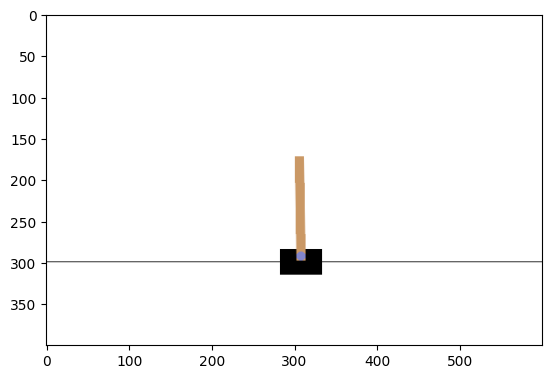

In [8]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

env = gym.make("CartPole-v1", render_mode="rgb_array")
obs, info = env.reset()

for _ in range(200):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    # Renderizar imagen
    img = env.render()
    plt.imshow(img)
    clear_output(wait=True)
    plt.show()

    if terminated or truncated:
        obs, info = env.reset()

env.close()

In [9]:
import gymnasium as gym
import imageio
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Cargar el modelo entrenado
model = PPO.load("cartpole_ppo")

# Crear el entorno con render para capturar frames
env = gym.make("CartPole-v1", render_mode="rgb_array")

frames = []
obs, info = env.reset()

for _ in range(500):  # más frames si quieres ver episodios completos
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    # Guardar frame
    frames.append(env.render())

    if terminated or truncated:
        obs, info = env.reset()

env.close()

# Guardar el video como MP4
video_path = "cartpole_simulation.mp4"
imageio.mimsave(video_path, frames, fps=30)

# Mostrar el video en Colab
from IPython.display import Video
Video(video_path, embed=True)

# Segundo Ejercicio

In [18]:
!pip install box2d
!pip install gymnasium

## LunarLander en video

En este ejercicio trabajamos con el entorno LunarLander-v2 de Gymnasium, que simula el aterrizaje controlado de un módulo lunar.
El objetivo es aprender una política que permita aterrizar suavemente dentro de la zona designada.

🎯 Objetivo del entorno
Controlar la nave para aterrizar en la superficie.

Mantener la nave estable y sin colisiones fuertes.

Usar los motores con eficiencia (evitar gasto excesivo).

📦 Observaciones del entorno
El estado (observation) es un vector con 8 valores:

Posición horizontal (x)

Posición vertical (y)

Velocidad horizontal (vx)

Velocidad vertical (vy)

Ángulo de la nave

Velocidad angular

Contacto de pata izquierda (booleano)

Contacto de pata derecha (booleano)

🎮 Acciones posibles
0: Apagar motores (sin acción)

1: Motor principal (empuje hacia arriba)

2: Motor lateral izquierdo (empuje hacia la derecha)

3: Motor lateral derecho (empuje hacia la izquierda)

🏆 Sistema de recompensas
Aterrizaje exitoso: recompensa positiva alta.

Golpe fuerte o salir de la zona: penalización.

Encender motores: pequeña penalización para fomentar eficiencia.

Mantener contacto suave con ambas patas: puntos extra.

In [21]:
import gymnasium as gym
import imageio
from IPython.display import Video

# Crear entorno con la versión actual
env = gym.make("LunarLander-v3", render_mode="rgb_array")
obs, info = env.reset()

frames = []
for _ in range(800):
    action = env.action_space.sample()  # acción aleatoria
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        obs, info = env.reset()

env.close()

# Guardar como video
video_path = "/content/lunarlander.mp4"
imageio.mimsave(video_path, frames, fps=30)

# Mostrar video en notebook
Video(video_path, embed=True)

# Tercer ejercicio Q Learning

## 📚 ¿Qué es Q-Learning?

**Q-Learning** es un algoritmo de **aprendizaje por refuerzo** (Reinforcement Learning, RL) que permite a un agente aprender cómo actuar en un entorno para maximizar una recompensa acumulada, **sin necesidad de conocer previamente el modelo del entorno**.

---

### 🔹 Principios básicos

- El agente interactúa con un **entorno** en pasos de tiempo.
- En cada paso:
  1. **Observa** el estado actual (*state*).
  2. **Elige** una acción (*action*) según una estrategia (por ejemplo, *ε-greedy*).
  3. **Recibe** una recompensa (*reward*).
  4. **Actualiza** su estimación de la calidad (*Q-value*) de esa acción en ese estado.

---

### 🔹 Ecuación de actualización de Q-Learning

La función Q se actualiza así:

\[
Q(s, a) \; \leftarrow \; Q(s, a) + \alpha \; \big[ \; r + \gamma \cdot \max_{a'} Q(s', a') \; - \; Q(s, a) \; \big]
\]

Donde:
- \( s \): estado actual
- \( a \): acción actual
- \( r \): recompensa recibida
- \( s' \): siguiente estado
- \( \alpha \): tasa de aprendizaje (*learning rate*)
- \( \gamma \): factor de descuento (*discount factor*)
- \( \max_{a'} Q(s', a') \): mejor valor estimado para el siguiente estado

---

### 🔹 Características clave
- **Fuera de política (off-policy)**: Aprende la mejor política independientemente de la que siga para explorar.
- **Basado en tablas** (*tabular Q-Learning*): Almacena valores Q en una tabla, útil para problemas con espacios de estados y acciones pequeños.
- Escalable a problemas grandes usando **Deep Q-Learning** (DQN), que usa redes neuronales para aproximar Q.

---

✅ **En resumen:** Q-Learning es una técnica poderosa para enseñar a un agente a tomar decisiones óptimas mediante prueba y error, utilizando solo recompensas y sin conocer cómo funciona internamente el entorno.


In [22]:
import gymnasium as gym
import numpy as np

# Crear entorno Taxi
env = gym.make("Taxi-v3", render_mode="ansi")

# Inicializar tabla Q
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Hiperparámetros
alpha = 0.1      # tasa de aprendizaje
gamma = 0.9      # factor de descuento
epsilon = 1.0    # exploración
epsilon_min = 0.1
epsilon_decay = 0.995
episodes = 5000
max_steps = 100

# Entrenamiento
for episode in range(episodes):
    state, info = env.reset()
    done = False

    for _ in range(max_steps):
        # Política ε-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Ejecutar acción
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Actualizar Q-table
        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state

        if done:
            break

    # Decaer epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

print("Entrenamiento terminado")

# Prueba del agente entrenado
state, info = env.reset()
done = False
total_reward = 0

while not done:
    action = np.argmax(q_table[state])
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    print(env.render())  # Mostrar el estado
    done = terminated or truncated

print(f"Recompensa total: {total_reward}")
env.close()

Entrenamiento terminado
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : 

## Ejercicio 4: MountainCar

🎯 Objetivo
El agente debe aprender a mover un carro que está en un valle y necesita tomar suficiente impulso para subir la colina y alcanzar la bandera en la cima de la derecha.

🧠 Características del entorno
Estado: Dos variables continuas:

Posición horizontal del carro.

Velocidad del carro.

Acciones:

0: Acelerar hacia la izquierda.

1: No acelerar.

2: Acelerar hacia la derecha.

Recompensa:

−1 por cada paso hasta que el carro alcance la cima.

El episodio termina al llegar a la cima o después de 200 pasos.

🔍 Dificultad
La física del problema impide que el carro suba directamente la colina, por lo que debe balancearse hacia atrás y luego hacia adelante para ganar impulso. Esto requiere planificación a largo plazo y exploración.

🏆 Meta de Aprendizaje
Usaremos Q-Learning con una tabla de valores Q discretizada, ya que las variables del estado son continuas y necesitan ser mapeadas a índices discretos para el algoritmo.

Episodio: 500, Epsilon: 0.082, Recompensa Promedio: -200.00
Episodio: 1000, Epsilon: 0.010, Recompensa Promedio: -199.00
Episodio: 1500, Epsilon: 0.010, Recompensa Promedio: -197.15
Episodio: 2000, Epsilon: 0.010, Recompensa Promedio: -188.91
Episodio: 2500, Epsilon: 0.010, Recompensa Promedio: -172.62
Episodio: 3000, Epsilon: 0.010, Recompensa Promedio: -173.70
Episodio: 3500, Epsilon: 0.010, Recompensa Promedio: -160.76
Episodio: 4000, Epsilon: 0.010, Recompensa Promedio: -157.70
Episodio: 4500, Epsilon: 0.010, Recompensa Promedio: -166.55
Episodio: 5000, Epsilon: 0.010, Recompensa Promedio: -149.42


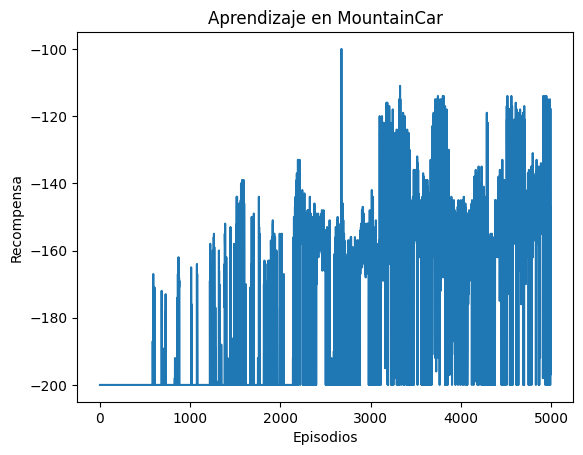

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import base64
import gymnasium as gym
import imageio

# --- Configuración del entorno ---
# Entrenamiento sin render
train_env = gym.make("MountainCar-v0")

# Discretización de estados
state_bins = [
    np.linspace(-1.2, 0.6, 20),
    np.linspace(-0.07, 0.07, 20)
]

def discretize_state(state):
    return tuple(np.digitize(s, bins) for s, bins in zip(state, state_bins))

# Inicializar Q-Table
q_table = np.zeros((20, 20, train_env.action_space.n))

# Hiperparámetros
alpha = 0.1     # tasa de aprendizaje
gamma = 0.99    # factor de descuento
epsilon = 1.0   # probabilidad de exploración
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 5000
rewards = []

# --- Entrenamiento ---
for episode in range(episodes):
    state, _ = train_env.reset()
    state = discretize_state(state)
    total_reward = 0
    done = False

    while not done:
        if np.random.rand() < epsilon:
            action = train_env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, _ = train_env.step(action)
        next_state = discretize_state(next_state)
        done = terminated or truncated

        # Actualización Q-Learning
        q_table[state][action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
        )

        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

    if (episode + 1) % 500 == 0:
        print(f"Episodio: {episode+1}, Epsilon: {epsilon:.3f}, "
              f"Recompensa Promedio: {np.mean(rewards[-500:]):.2f}")

train_env.close()

# --- Gráfico de recompensas ---
plt.plot(rewards)
plt.xlabel("Episodios")
plt.ylabel("Recompensa")
plt.title("Aprendizaje en MountainCar")
plt.show()

In [25]:
# --- Generar video ---
def create_video(q_table):
    video_env = gym.make("MountainCar-v0", render_mode="rgb_array")
    frames = []
    state, _ = video_env.reset()
    state = discretize_state(state)
    done = False

    while not done:
        frames.append(video_env.render())
        action = np.argmax(q_table[state])
        next_state, _, terminated, truncated, _ = video_env.step(action)
        state = discretize_state(next_state)
        done = terminated or truncated

    video_env.close()

    video_path = "/content/mountaincar.mp4"
    imageio.mimsave(video_path, frames, fps=30)
    return video_path

video_file = create_video(q_table)

# --- Mostrar en Colab ---
mp4 = open(video_file, 'rb').read()
data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()
HTML(f'<video width="640" height="480" controls><source src="{data_url}" type="video/mp4"></video>')


# Ejercicio 5

🧠 Conceptos Clave
Entorno Taxi-v3

Una cuadrícula 5x5 con ubicaciones predefinidas para recoger y dejar pasajeros.

El taxi debe aprender a moverse eficientemente, evitando movimientos innecesarios.

Estados (s)

Codifican la posición del taxi, la ubicación del pasajero y el destino.

Acciones (a)

0: Mover al sur

1: Mover al norte

2: Mover al este

3: Mover al oeste

4: Recoger pasajero

5: Dejar pasajero

Recompensas (r)

+20 por dejar al pasajero en el lugar correcto.

-1 por cada movimiento (para incentivar eficiencia).

-10 por intentar recoger o dejar en el lugar equivocado.

Objetivo

Minimizar el tiempo y maximizar la recompensa total.

Algoritmo Usado

Q-Learning (aprendizaje basado en tabla Q para entornos discretos).



In [31]:
import gymnasium as gym
import numpy as np
import random

# Crear el entorno
env = gym.make("Taxi-v3", render_mode="ansi")  # "ansi" para capturar el render como texto

# Inicializar tabla Q
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hiperparámetros
alpha = 0.1      # Tasa de aprendizaje
gamma = 0.6      # Factor de descuento
epsilon = 0.1    # Probabilidad de exploración
episodes = 20000

# Entrenamiento
for _ in range(episodes):
    state, _ = env.reset()  # Nuevo formato devuelve (state, info)
    done = False

    while not done:
        # Exploración vs Explotación
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated

        # Actualizar Q-Table con la fórmula de Q-Learning
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

print("Entrenamiento completado ✅")

Entrenamiento completado ✅


In [32]:
# Probar el agente entrenado
state, _ = env.reset()
done = False

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, truncated, _ = env.step(action)
    done = done or truncated

    # Render del entorno como texto
    print(env.render())

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| |

# Frozen lake

In [33]:
import gymnasium as gym
import numpy as np
import random

# Crear entorno FrozenLake (no determinista)
env = gym.make("FrozenLake-v1", is_slippery=True)

# Inicializar Q-Table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hiperparámetros
alpha = 0.1     # Tasa de aprendizaje
gamma = 0.99    # Factor de descuento
epsilon = 0.1   # Probabilidad de exploración
episodios = 10000

# Entrenamiento
for episodio in range(episodios):
    state, _ = env.reset()
    done = False

    while not done:
        # Selección de acción: exploración o explotación
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Ejecutar acción
        next_state, reward, done, _, _ = env.step(action)

        # Actualizar Q-Table usando la ecuación de Bellman
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Pasar al siguiente estado
        state = next_state

print("✅ Entrenamiento completado")

# Prueba del agente entrenado
state, _ = env.reset()
env.render()
done = False

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, _, _ = env.step(action)
    env.render()

env.close()

✅ Entrenamiento completado


/usr/local/lib/python3.11/dist-packages/gymnasium/envs/toy_text/frozen_lake.py:333: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


In [36]:
import gymnasium as gym

# Crear el entorno en modo texto
env = gym.make("FrozenLake-v1", render_mode="ansi")

# Reiniciar el entorno
state, info = env.reset()

# Mostrar el estado inicial
print(env.render())

# Simular algunos pasos aleatorios
done = False
while not done:
    action = env.action_space.sample()  # Acción aleatoria
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Mostrar el tablero después de cada acción
    print(env.render())
    print(f"Acción: {action}, Recompensa: {reward}")

env.close()


SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

Acción: 0, Recompensa: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG

Acción: 2, Recompensa: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG

Acción: 2, Recompensa: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG

Acción: 0, Recompensa: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG

Acción: 2, Recompensa: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG

Acción: 1, Recompensa: 0.0
